In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook

from itertools import product

In [69]:
df=pd.read_excel("Data Used Car.xlsx")

In [70]:
df

,Bulan,Used_Car_Transaction
0,2014-01-01,635800
1,2014-02-01,613513
2,2014-03-01,649313
3,2014-04-01,658105
4,2014-05-01,659305
...,...,...
109,2023-02-01,606890
110,2023-03-01,620958
111,2023-04-01,613540
112,2023-05-01,626649


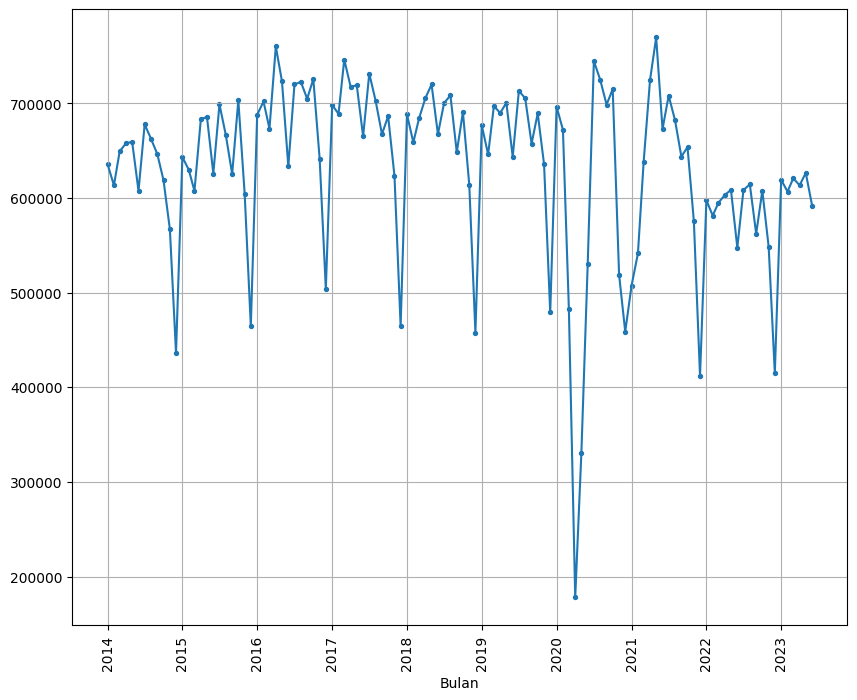

In [71]:
#visualize
fig= plt.figure(figsize=(10,8))
plt.plot(df["Bulan"], df["Used_Car_Transaction"])
plt.scatter(df["Bulan"], df["Used_Car_Transaction"], s=8)
plt.xticks(rotation=90)
plt.xlabel('Bulan')
plt.grid(True)

#Setiap Desember runtuh.

C:\Users\Rhey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


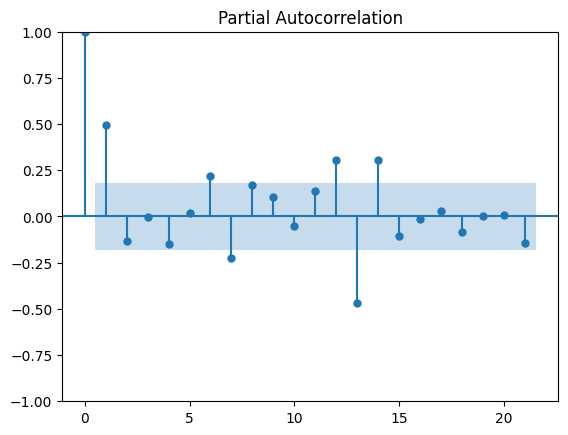

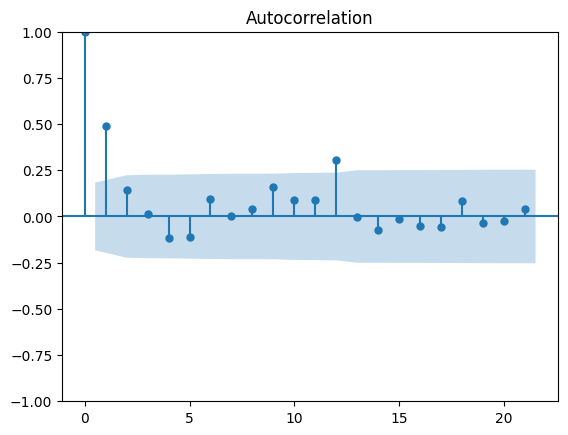

In [72]:
plot_pacf(df['Used_Car_Transaction'])
plot_acf(df['Used_Car_Transaction'])
print("")   #Avoid plot replicating.

H0: PVal > 0.05;        Data non stasioner

H1: Pval <0.05          Data Stasioner

In [73]:
ad_fuller_result = adfuller(df['Used_Car_Transaction'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')                #Non stasioner

ADF Statistic: -1.6166058238043606
p-value: 0.47450917699076195


In [74]:
#log difference to make data stationary
df['Used_Car_Transaction'] = np.log(df['Used_Car_Transaction'])
df['Used_Car_Transaction'] = df['Used_Car_Transaction'].diff()
df = df.drop(df.index[0])

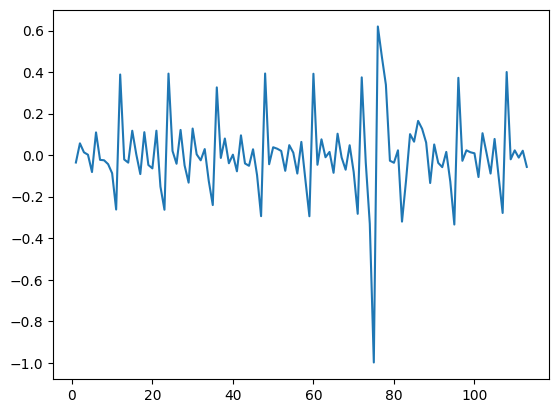

In [75]:
plt.plot(df['Used_Car_Transaction'])

H0: PVal > 0.05;        Data non stasioner

H1: Pval <0.05          Data Stasioner

In [76]:
ad_fuller_result = adfuller(df['Used_Car_Transaction'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')                #Tolak H0

ADF Statistic: -4.547055687658203
p-value: 0.00016152566959246886


C:\Users\Rhey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


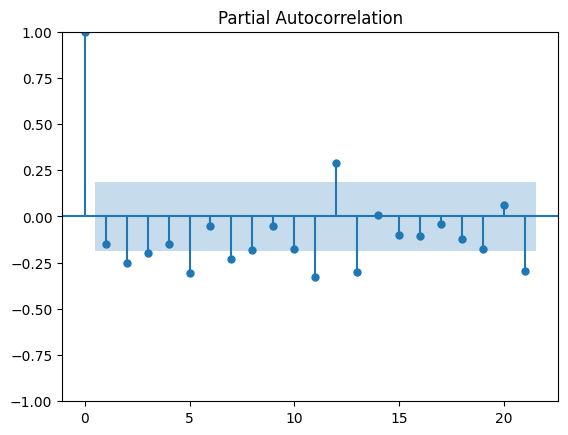

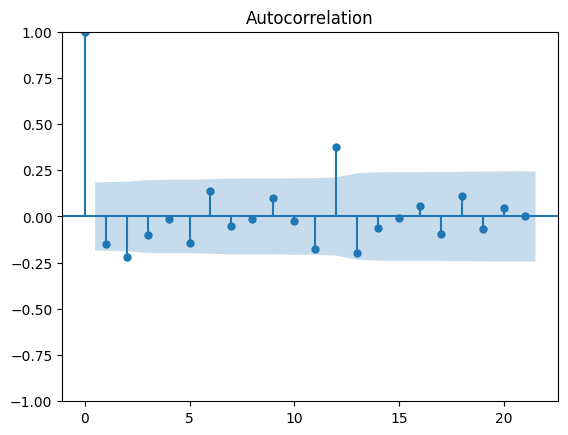

In [77]:
plot_pacf(df['Used_Car_Transaction'])
plot_acf(df['Used_Car_Transaction'])
print("")

In [68]:
def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 1
Q = range(0, 4, 1)
s = 4

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))